<a href="https://colab.research.google.com/github/GoKuKo/WorkFromColab/blob/master/EgyptianCubeRodUsingGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
lines = []
while True:
    line = input()
    if line:
        lines.append(line)
    else:
        break
a=pd.DataFrame(lines)
a[[0,1]] = a[0].str.split(" ",expand=True,)


1 2
2 3
1 3



In [0]:
out=0

In [0]:
def rod(a):
    for i in range(a.shape[0]):
        x,y=a.iloc[i,]
        b=a.drop(a.index[i])
        bool1 = b.isin([x])
        bool2 = b.isin([y])
        if sum(bool1)>0 and sum(bool2)>0:
            global out
            out=out+1
            a=a.drop(a.index[i])
            rod(a)
            return out

In [0]:
rod(a)

3

In [0]:
out

3

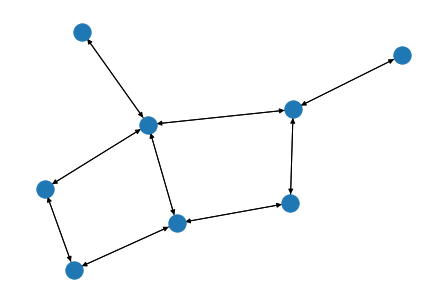

4.0


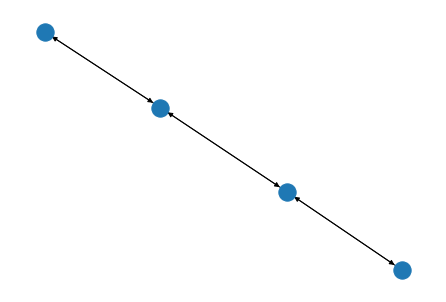

1


In [67]:
import networkx as nx
import matplotlib.pyplot as plt

def maxRods(k) :
    singleRodSystem = list(set(tuple(sorted(i)) for i in k))
    g = nx.Graph()
    # add nodes inorder to see the name of each node.
    g.add_edges_from(singleRodSystem)
    dg = nx.DiGraph(g)
    nx.draw(dg)
    plt.show()
    no_of_cycles = (len(list(nx.simple_cycles(dg)))-len(singleRodSystem))/2-1
    double_rods = (len(k)- len(singleRodSystem))
    return no_of_cycles + double_rods if no_of_cycles > 0 else double_rods
    
print(maxRods([[42,35],[20,35],[35,20],[42,10],[10,42],[10,20],[20,45], [20,95],[95,37],[73,95],[35,73]]))
print(maxRods([[42,35],[20,35],[35,20],[42,10]]))
